In [35]:
import pandas as pd
import numpy as np
import os
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [51]:
df = pd.read_csv("../data/bikes_cleaned.csv") 

In [37]:
df.dropna(inplace=True)

In [38]:
label_encoders = {}
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le 

In [52]:
# Data Preparation
X = df.drop(['price'] + non_numeric, axis=1)
y = df['price']

In [53]:
# Impute any missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)


In [54]:
# Train/Test Split
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Model 1: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

print("🔹 Linear Regression")
print("MAE:", mean_absolute_error(y_test, lr_preds))
print("MSE:", mean_squared_error(y_test, lr_preds))
print("R2:", r2_score(y_test, lr_preds))

🔹 Linear Regression
MAE: 25933.16871852731
MSE: 2162322069.1842675
R2: 0.5072855790566395


In [43]:
# Model 2: Random Forest with Tuning
rf = RandomForestRegressor(random_state=42)
param_grid = {'n_estimators': [100], 'max_depth': [10, 20, None]}
grid = GridSearchCV(rf, param_grid, cv=3)
grid.fit(X_train, y_train)

rf_best = grid.best_estimator_
rf_preds = rf_best.predict(X_test)

print("🔹 Random Forest")
print("MAE:", mean_absolute_error(y_test, rf_preds))
print("MSE:", mean_squared_error(y_test, rf_preds))
print("R2:", r2_score(y_test, rf_preds))

🔹 Random Forest
MAE: 13478.026652878654
MSE: 1338489470.8027315
R2: 0.6950070140133446


In [44]:
#Model 3: Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_preds = ridge.predict(X_test)

print("🔹 Ridge Regression")
print("MAE:", mean_absolute_error(y_test, ridge_preds))
print("MSE:", mean_squared_error(y_test, ridge_preds))
print("R2:", r2_score(y_test, ridge_preds))

🔹 Ridge Regression
MAE: 25933.175143266246
MSE: 2162319969.7963343
R2: 0.5072860574306638


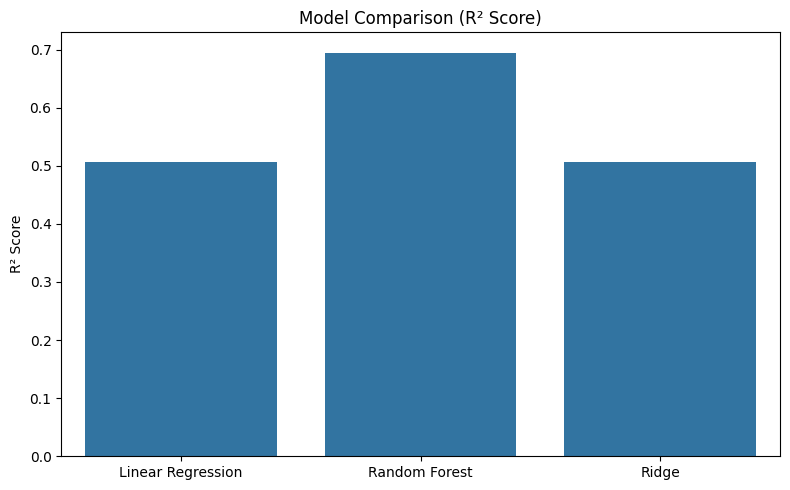

In [45]:
# Plot Model Comparison
models = ['Linear Regression', 'Random Forest', 'Ridge']
r2_scores = [r2_score(y_test, lr_preds), r2_score(y_test, rf_preds), r2_score(y_test, ridge_preds)]

plt.figure(figsize=(8,5))
sns.barplot(x=models, y=r2_scores)
plt.title("Model Comparison (R² Score)")
plt.ylabel("R² Score")
plt.tight_layout()
plt.savefig("../outputs/graphs/model_comparison.png")
plt.show()